# Aplicacion del Teorema Central del Límite y la Ley de los Grandes Números

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Simulación de la LGN

Simularemos los lanzamientos de un dado y calcularemos la media:
$$ \Omega = \{1,2,3,4,5,6 \}$$
y además la media teórica es:
$$ \mathbb{E}[X] = 3.5$$

In [7]:
np.random.seed(42) # números pseudoaleatorios reproducibles

# Vamos a simular 10,000 lanzamientos de un dado

lanzamientos = np.random.randint(1,7,size=10000) # genero 10,000 lanzamientos entre 1 y 6

media_acum = np.cumsum(lanzamientos)/np.arange(1,10001) # media acumulada

df = pd.DataFrame({
    'Lanzamiento':np.arange(1,10001),
    'Media Acumulada':media_acum}
)

df

,Lanzamiento,Media Acumulada
0,1,4.00000
1,2,4.50000
2,3,4.00000
3,4,4.25000
4,5,4.40000
...,...,...
9995,9996,3.50030
9996,9997,3.50015
9997,9998,3.50000
9998,9999,3.49985


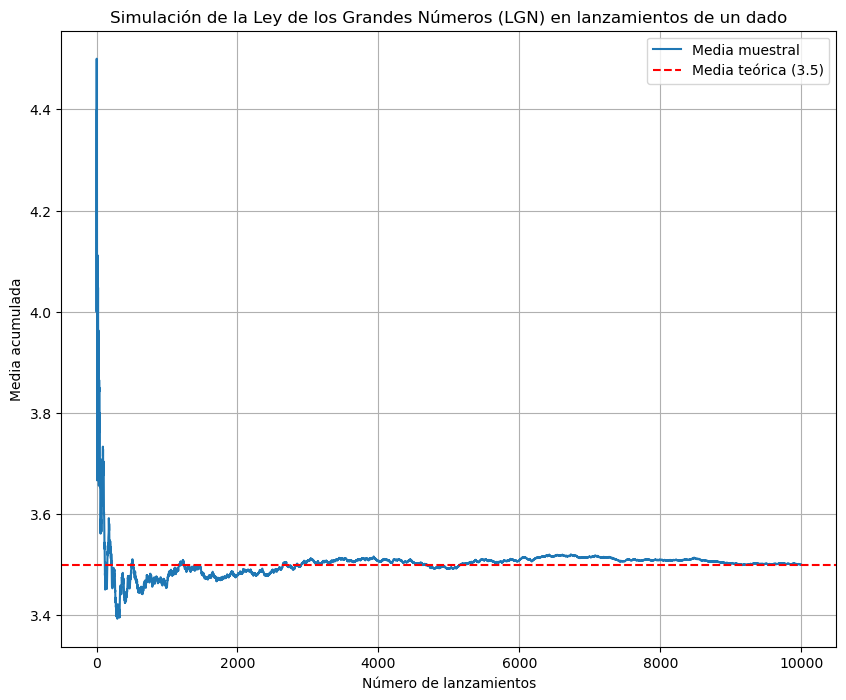

In [10]:
plt.figure(figsize=(10,8))

plt.plot(df['Lanzamiento'],df['Media Acumulada'], label='Media muestral')
plt.axhline(3.5,c='r',linestyle ='--',label='Media teórica (3.5)')

plt.xlabel('Número de lanzamientos')
plt.ylabel('Media acumulada')
plt.title('Simulación de la Ley de los Grandes Números (LGN) en lanzamientos de un dado')

plt.legend()
plt.grid()
plt.show()


## Problema de la Aguja de Bufón

[Descripción del problema de la aguja.](https://mste.illinois.edu/activity/buffon/)

In [14]:
# Parámetro del problema

l = 1 # longitud de la aguja
d = 1 # distancia entre las lineas paralelas
num_lanzamientos = 100000 # número total de lanzamientos
step = 100 # el número de pasos


# Listas para guardar resultados

pi_estimados = [] # almacena los valores de pi estimados
lanzamientos_realizados = [] # almacena el número de lanzamientos realizados


# Contador de los cruces de la linea

cruces = 0


In [15]:
# Simulación de los lanzamientos de la aguja 

for i in range(1,num_lanzamientos+1):
    # Posición del centro de la aguja 
    centro = np.random.uniform(0,d/2)

    # Angulo aleatorio entre 0 y pi
    angulo = np.random.uniform(0,np.pi)

    # Distancia desde el centro de la aguja hasta la línea más cercana
    distancia = (l/2) * np.sin(angulo)

    # Verificamos si la aguja cruza una linea
    if centro <= distancia: # Si la distancia al centro es menor o igual a la distancia calculada
        cruces += 1 # incrementamos al contador

    # Estimación de pi en pasos
    if i % step == 0 and cruces > 0: 
        pi_estimado = (2*l*i)/(d*cruces)
        pi_estimados.append(pi_estimado)
        lanzamientos_realizados.append(i)

print(f'Estimación de pi: {pi_estimados}')



Estimación de pi: [3.076923076923077, 3.0303030303030303, 2.955665024630542, 2.985074626865672, 3.0120481927710845, 3.037974683544304, 3.104212860310421, 3.125, 3.130434782608696, 3.1446540880503147, 3.1117397454031117, 3.11284046692607, 3.1026252983293556, 3.131991051454139, 3.1055900621118013, 3.1067961165048543, 3.142329020332717, 3.130434782608696, 3.137902559867878, 3.1397174254317113, 3.1226765799256504, 3.120567375886525, 3.1377899045020463, 3.1393067364290386, 3.134796238244514, 3.1476997578692494, 3.137710633352702, 3.131991051454139, 3.1453362255965294, 3.1266284523189163, 3.1155778894472363, 3.11284046692607, 3.1117397454031117, 3.1078610603290677, 3.113879003558719, 3.116883116883117, 3.1223628691983123, 3.1147540983606556, 3.117505995203837, 3.127443315089914, 3.1333588077951853, 3.131991051454139, 3.1375410434148123, 3.1294452347083928, 3.1315240083507305, 3.132448076268301, 3.1302031302031303, 3.132137030995106, 3.1349968010236724, 3.134796238244514, 3.1278748850045996, 

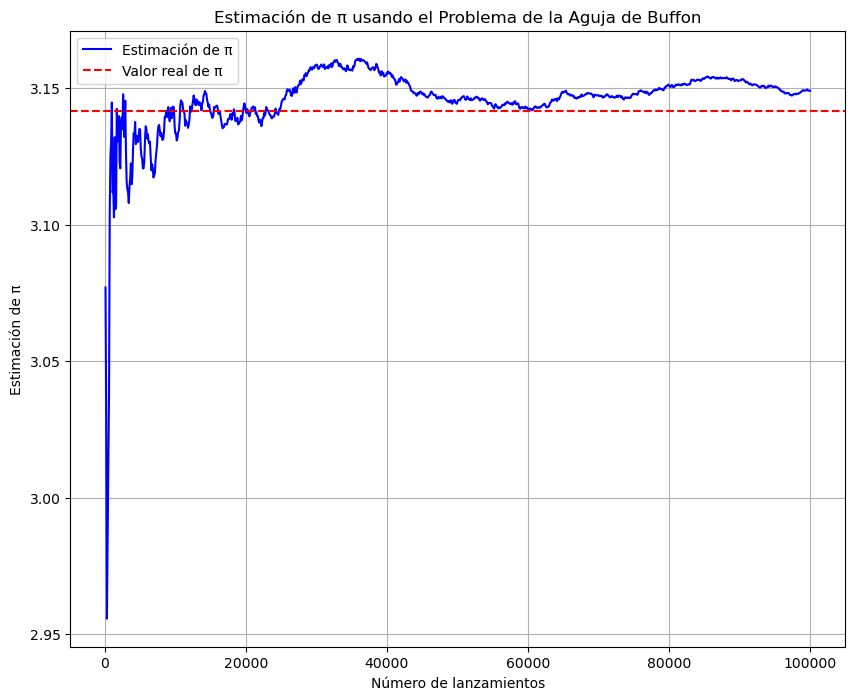

In [19]:
# Graficamos la estimación de pi
plt.figure(figsize=(10,8))
plt.plot(lanzamientos_realizados, pi_estimados, label='Estimación de π', color='blue')
plt.axhline(np.pi, color='red', linestyle='--', label='Valor real de π')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Estimación de π')
plt.title('Estimación de π usando el Problema de la Aguja de Buffon')    
plt.legend()
plt.grid()
plt.show()

In [23]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [27]:
# Crear el DataFrame con 1000 muestras, cada una con 10 observaciones de una binomial(n=1000, p=0.6)

df = pd.DataFrame() # DataFrame vacío

for i in range(1,1001):
  muestra = np.random.binomial(1000,0.6,10)  # Muestra aleatoria de binomiales de 10 éxitos, se realiza 1000 veces el experimento
  # Xj ~ Bin(1000,0.6), j=1,...,10 
  col = f"muestra {i}" # Nombre de la columna
  df[col] = muestra # Agrego la muestra como una nueva columna en el DataFrame
  
df.head(5)  # Mostrar las primeras 5 filas

# Calcular el promedio de cada muestra (el promedio de cada columna)
df_muestra_medias = pd.DataFrame(df.mean(), columns=["Media de la muestra"])

/tmp/ipykernel_249725/4253771523.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_muestra_medias)


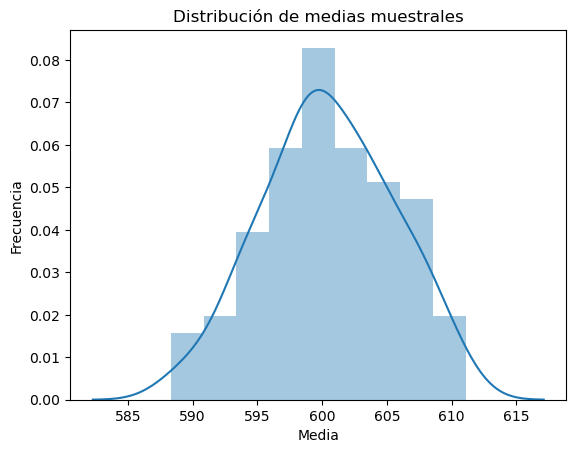

In [32]:

# lo cual me lleva a tener 100 medias muestrales
# Visualizar la distribución de las medias
sns.distplot(df_muestra_medias)
plt.title("Distribución de medias muestrales")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.show()